In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X = df.drop(['SkinThickness', 'Insulin', 'Outcome'], axis=1)
y = df['Outcome']

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,33.6,0.627,50
1,1,85,66,26.6,0.351,31
2,8,183,64,23.3,0.672,32
3,1,89,66,28.1,0.167,21
4,0,137,40,43.1,2.288,33


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
X_train.shape

(576, 6)

In [11]:
y_train.shape

(576,)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7760416666666666

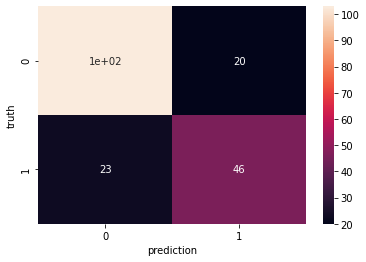

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')
plt.show()

In [15]:
import joblib
joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']